In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\Users\sdotson\AppData\Local\miniforge3\envs\kansas-city\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [1]:
puma_county_id = "G5600330"
puma_county_id = "G2002090"

In [24]:
BASE_URL = (
    "https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock"
    "/end-use-load-profiles-for-us-building-stock")
def create_weather_url(puma_id,
                        year=2021,
                        product='resstock',
                        weather_version='tmy3',
                        release=1,
                        ):

    data_route = (f"/{year}"
                  f"/{product}_{weather_version}_release_{release}"
                  "/weather/tmy3/")

    file = f"{puma_id.upper()}.csv"

    return BASE_URL + data_route + file

In [25]:
weather_url = create_weather_url(puma_id=puma_county_id)

In [26]:
weather_url == url

False

In [28]:
url

'https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2021/resstock_tmy3_release_1/weather/tmy3/G2002090_tmy3.csv'

In [ ]:
'https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2021/resstock_tmy3_release_1/weather/tmy3/G2002090.csv'
'https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2021/resstock_tmy3_release_1/weather/tmy3/G2002090_tmy3.csv'

In [16]:
url = f'https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2021/resstock_tmy3_release_1/weather/tmy3/{puma_county_id}_tmy3.csv'

In [19]:
df = pd.read_csv(url, parse_dates=True)
timestamps = pd.date_range(start='2018-01-01', freq='h', periods=8760)

In [21]:
df.index=timestamps

In [23]:
df.columns

Index(['date_time', 'Dry Bulb Temperature [°C]', 'Relative Humidity [%]',
       'Wind Speed [m/s]', 'Wind Direction [Deg]',
       'Global Horizontal Radiation [W/m2]', 'Direct Normal Radiation [W/m2]',
       'Diffuse Horizontal Radiation [W/m2]'],
      dtype='object')

<Axes: >

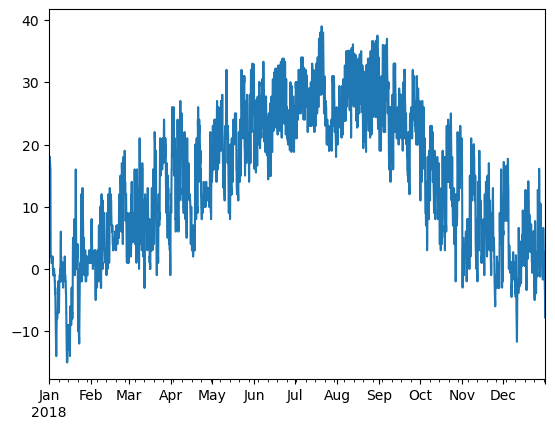

In [22]:
df.loc[:, 'Dry Bulb Temperature [°C]'].plot()